# Counts over time

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import datetime

from pathlib import Path

from utils import ref_date, read_data

In [2]:
data_path = Path('../data/The Big Beep Theory - BEEP.csv')
data = read_data(data_path, absolute_dates=True)

## Plot cumulative counts as function of time

In [3]:
days = []
counts = []
for day, entry in data.items():
    days.append(day)
    counts.append(len(entry))
cum_counts = np.cumsum(counts)

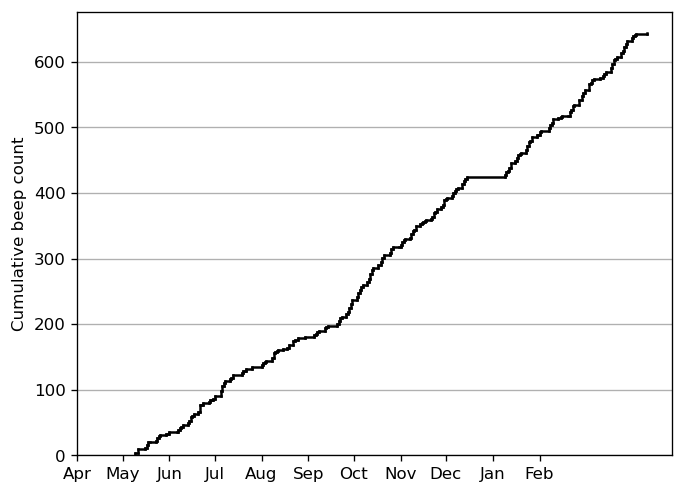

In [4]:
fig, ax = plt.subplots(dpi=120)

# Initial vertical line
ax.plot([days[0],days[0]], [0,cum_counts[0]], c='k')

for j in range(len(days)-1):
    # Horizontal line
    ax.plot([days[j],days[j+1]], [cum_counts[j],cum_counts[j]], c='k')
    # Vertical line
    ax.plot([days[j+1],days[j+1]], [cum_counts[j],cum_counts[j+1]], c='k')
    
ax.set_ylabel('Cumulative beep count')
ax.set_ylim(0)

# Convert x-axis tick labels from day number to month
tick_locs = []
months = []

for day in np.arange(ax.get_xticks()[0], ax.get_xticks()[-1]):
    
    # Convert the day number to a month
    m = (ref_date + datetime.timedelta(days=day)).strftime('%b')
    
    # Every time we reach a new month, record its x-axis position
    if m not in months:
        tick_locs.append(day)
        months.append(m)

ax.set_xticks(ticks=tick_locs[1:], labels=months[1:])

ax.grid(axis='y')

fig.savefig(
    'figures/cumulative_beep_count.png', 
    facecolor='w', 
    bbox_inches='tight', 
    dpi=180
    )

## Plot cumulative counts per observer

In [5]:
# Get a dictionary with a key for each observer which counts the number of
# beeps recorded each day
observer_counts = {}
for day, entry in data.items():
    for (time, observer) in entry:
        if observer in observer_counts.keys():
            if day in observer_counts[observer].keys():
                observer_counts[observer][day] += 1
            else:
                observer_counts[observer][day] = 1
        else:
            observer_counts[observer] = {day: 1}

# Make a days and cumulative counts list for each observer and store to a 
# dictionary
cum_counts_per_obs = {}
for observer, counts_i in observer_counts.items():
    days_i = np.array(list(counts_i.keys()))
    cum_counts_i = np.cumsum(list(counts_i.values()))
    cum_counts_per_obs[observer] = [days_i, cum_counts_i]

# Remove the 'unknown' observer entry from the dict
_ = cum_counts_per_obs.pop('unknown')

# Sort entries according to number of beeps observed
sorted_keys = sorted(cum_counts_per_obs, key=lambda x: cum_counts_per_obs[x][1][-1], reverse=True) 

cum_counts_per_obs_sorted = {k: cum_counts_per_obs[k] for k in sorted_keys}
cum_counts_per_obs = cum_counts_per_obs_sorted

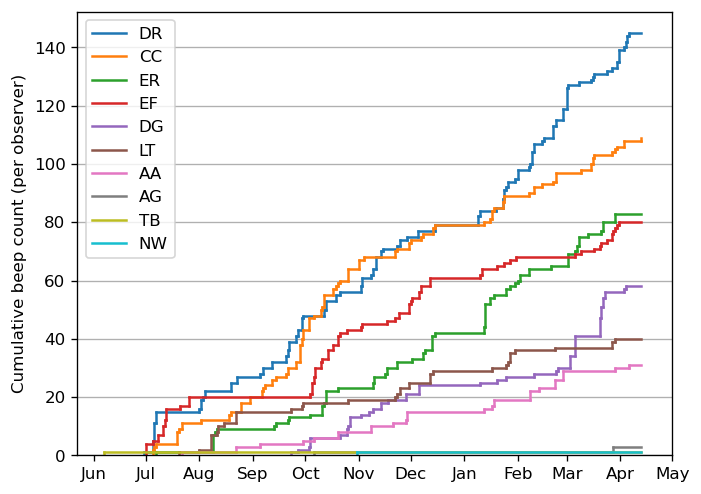

In [6]:
fig, ax = plt.subplots(dpi=120)

for i, (observer, entry) in enumerate(cum_counts_per_obs.items()):
    c = f'C{i}'
    days_i, cum_counts_i = entry
    
    # Initial vertical line
    ax.plot([days_i[0],days_i[0]], [0,cum_counts_i[0]], c=c, label=observer)
    
    for j in range(len(days_i)-1):
        # Horizontal line
        ax.plot([days_i[j],days_i[j+1]], [cum_counts_i[j],cum_counts_i[j]], c=c)
        # Veritical line
        ax.plot([days_i[j+1],days_i[j+1]], [cum_counts_i[j],cum_counts_i[j+1]], c=c)
    
    # Final horizontal line 
    ax.plot([days_i[-1],max(days)], [cum_counts_i[-1],cum_counts_i[-1]], c=c)

ax.set_ylabel('Cumulative beep count (per observer)')
ax.set_ylim(0)

# Convert x-axis tick labels from day number to month
tick_locs = []
months = []

for day in np.arange(ax.get_xticks()[1], ax.get_xticks()[-1]):
    
    # Convert the day number to a month
    m = (ref_date + datetime.timedelta(days=day)).strftime('%b')
    
    # Every time we reach a new month, record its x-axis position
    if m not in months:
        tick_locs.append(day)
        months.append(m)
        
# Move the first tick to the start of the month
tick_date = ref_date + datetime.timedelta(days=tick_locs[0])
adjusted_tick_loc = (datetime.datetime(tick_date.year, tick_date.month, 1) - ref_date).days
tick_locs[0] = adjusted_tick_loc
        
ax.set_xticks(ticks=tick_locs, labels=months)

ax.legend()
ax.grid(axis='y')

fig.savefig(
    'figures/cumulative_beep_count_per_obs.png', 
    facecolor='w', 
    bbox_inches='tight', 
    dpi=180
    )